## Khalil Koudary
### ID: 40088454

##### COMP 333: Data Analysis, Lab Assignment 2
##### Descriptive Data Analysis 

###### Input Source: Week 2 Material : Example 1, 2, & 3

### Task 1

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import iqr

#Python function quantDDA(), extends the capabilities of the describe() function of pandas
#and scipy. It takes a dataframe as input.

def quantDDA(df):
    # initialize an empty dataframe to store results
    
    result = pd.DataFrame()
    
    for col in df.columns:
        
        col_result = pd.Series(dtype='float64')
        
        col_df = df[col]
        
        # Finding number of observations (rows)
        col_result['num_obs'] = len(col_df)
        
        #Number of entries in the dataframe
        col_result['num_entries'] = col_df.count()
        
        #Number of unique entries in the dataframe
        col_result['num_unique'] = len(col_df.unique())
        
        #Number of missing entries in the dataframe
        col_result['num_missing'] = col_result['num_obs'] - col_result['num_entries']
        
        #if the feature is continuous, find the mean, std_dev, max, min, Q3, Q2
        #Q1, skewness, kurtosis, and number of outliers & extreme values
        if df[col].notnull().any():
            if df[col].dtype in ['int64', 'float64']:
            
                #Finding Q1, Q2, Q3
                q1, q2, q3 = np.percentile(col_df.dropna(), [25, 50, 75])
                col_result['Q3'] = q3
                col_result['Q2'] = q2
                col_result['Q1'] = q1

                #Calculating IQR
                IQR=q3-q1

                #Calculate upper and lower bounds for outliers
                upper_bound_outlier = q3 + (1.5*IQR)
                lower_bound_outlier = q1- (1.5*IQR)

                #Calculate upper and lower bounds for extreme values
                upper_bound_extreme = q3 + (3*IQR)
                lower_bound_extreme = q1- (3*IQR)

                #Calculating number of outliers
                col_result['num_outliers'] = ((df[col]<lower_bound_outlier) |(df[col]>upper_bound_outlier) ).sum()

                #Calculating number of extreme values
                col_result['num_extreme'] = ((df[col]<lower_bound_extreme) |(df[col]>upper_bound_extreme) ).sum()

                #Calculating mode
                col_result['mode'] = col_df.mode().values[0]

                #Calculating mean
                col_result['mean'] = col_df.mean()

                #Calculating standard deviation
                col_result['std_dev'] = col_df.std()

                #Calculating max
                col_result['max'] = col_df.max()

                #Calculating min
                col_result['min'] = col_df.min()

                #Calculating skewness
                col_result['skewness'] = col_df.skew()

                #Calculating kurtosis
                col_result['kurtosis'] = col_df.kurtosis()
            else:
                #if the feature is catagorical, only mode can be calculated
                col_result['mode'] = col_df.mode().values[0]
            
        result = pd.concat([result, col_result.to_frame(col).T])
            
    return result


##### Testing quantDDA function on Restaurant Tipping example

In [2]:
df_restaurant = pd.read_csv("tips.csv")
df_restaurant

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
quantDDA(df_restaurant)

,num_obs,num_entries,num_unique,num_missing,Q3,Q2,Q1,num_outliers,num_extreme,mode,mean,std_dev,max,min,skewness,kurtosis
total_bill,244.0,244.0,229.0,0.0,24.1275,17.795,13.3475,9.0,0.0,13.42,19.785943,8.902412,50.81,3.07,1.133213,1.218484
tip,244.0,244.0,123.0,0.0,3.5625,2.900,2.0000,9.0,2.0,2.0,2.998279,1.383638,10.00,1.00,1.465451,3.648376
sex,244,244,2,0,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,244,2,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
day,244,244,4,0,NaN,NaN,NaN,NaN,NaN,Sat,NaN,NaN,NaN,NaN,NaN,NaN
time,244,244,2,0,NaN,NaN,NaN,NaN,NaN,Dinner,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,244.0,6.0,0.0,3.0000,2.000,2.0000,9.0,0.0,2.0,2.569672,0.951100,6.00,1.00,1.447882,1.731700


##### Testing quantDDA function on Restaurant Tipping example

In [4]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
quantDDA(df_titanic)

,num_obs,num_entries,num_unique,num_missing,Q3,Q2,Q1,num_outliers,num_extreme,mode,mean,std_dev,max,min,skewness,kurtosis
PassengerId,891.0,891.0,891.0,0.0,668.5,446.0000,223.5000,0.0,0.0,1.0,446.000000,257.353842,891.0000,1.00,0.000000,-1.200000
Survived,891.0,891.0,2.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.383838,0.486592,1.0000,0.00,0.478523,-1.775005
Pclass,891.0,891.0,3.0,0.0,3.0,3.0000,2.0000,0.0,0.0,3.0,2.308642,0.836071,3.0000,1.00,-0.630548,-1.280015
Name,891,891,891,0,NaN,NaN,NaN,NaN,NaN,"Abbing, Mr. Anthony",NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,891,2,0,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,714.0,89.0,177.0,38.0,28.0000,20.1250,11.0,0.0,24.0,29.699118,14.526497,80.0000,0.42,0.389108,0.178274
SibSp,891.0,891.0,7.0,0.0,1.0,0.0000,0.0000,46.0,12.0,0.0,0.523008,1.102743,8.0000,0.00,3.695352,17.880420
Parch,891.0,891.0,7.0,0.0,0.0,0.0000,0.0000,213.0,213.0,0.0,0.381594,0.806057,6.0000,0.00,2.749117,9.778125
Ticket,891,891,681,0,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,891.0,248.0,0.0,31.0,14.4542,7.9104,116.0,53.0,8.05,32.204208,49.693429,512.3292,0.00,4.787317,33.398141


##### Testing quantDDA function on PISA example


In [6]:
df_pisa = pd.read_spss("pisa.sav")
df_pisa

,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,ADMINMODE,...,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID
0,Albania,Albania,800002.0,07MS,Albania,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN
1,Albania,Albania,800003.0,07MS,Albania,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN
2,Albania,Albania,800004.0,07MS,Albania,Albania,ALB - stratum 11: Rural / South / Public,Albania,No,Computer,...,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN
3,Albania,Albania,800005.0,07MS,Albania,Albania,ALB - stratum 07: Rural / North / Public,Albania,No,Computer,...,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN
4,Albania,Albania,800006.0,07MS,Albania,Albania,ALB - stratum 05: Urban / South / Public,Albania,No,Computer,...,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,Tatarstan (RUS),Tatarstan (RUS),98300802.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,1.0245,0.1964,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN
21899,Tatarstan (RUS),Tatarstan (RUS),98300803.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,0.6606,0.6736,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN
21900,Tatarstan (RUS),Tatarstan (RUS),98300804.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,-0.2376,-1.4551,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN
21901,Tatarstan (RUS),Tatarstan (RUS),98300805.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,0.1111,-0.0019,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN


In [7]:
quantDDA(df_pisa)

,num_obs,num_entries,num_unique,num_missing,mode,Q3,Q2,Q1,num_outliers,num_extreme,mean,std_dev,max,min,skewness,kurtosis
CNTRYID,21903,21903,80,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT,21903,21903,80,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNTSCHID,21903.0,21903.0,21903.0,0.0,800002.0,7.030002e+07,4.000022e+07,1.910014e+07,0.0,0.0,4.347357e+07,2.728971e+07,9.830081e+07,800002.00000,0.092814,-1.168849
CYC,21903,21903,1,0,07MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NatCen,21903,21903,79,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W_SCHGRNRABWT,21903.0,21903.0,12947.0,0.0,1.0,1.588054e+01,5.452380e+00,1.945035e+00,2800.0,1792.0,2.357205e+01,7.300321e+01,1.892211e+03,0.86354,9.043387,112.791941
W_FSTUWT_SCH_SUM,21903.0,21903.0,21075.0,0.0,42.30265,1.184157e+03,3.114835e+02,1.231393e+02,2731.0,1610.0,1.309747e+03,3.206526e+03,6.917005e+04,1.00000,7.376085,82.299053
SENWT,21903.0,21903.0,13044.0,0.0,5.50544,2.340857e+01,1.139931e+01,5.505440e+00,1406.0,592.0,1.826234e+01,2.214126e+01,3.287267e+02,0.15084,3.786689,24.311327
VER_DAT,21903,21903,79,0,26APR19:08:54:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def vizDDA(df):
    
    #using seaborn pairplot method to output a grid of plots of all the features against each other
    sns.pairplot(df, vars = df.columns)
    plt.show()

##### Testing vizDDA on tipping example

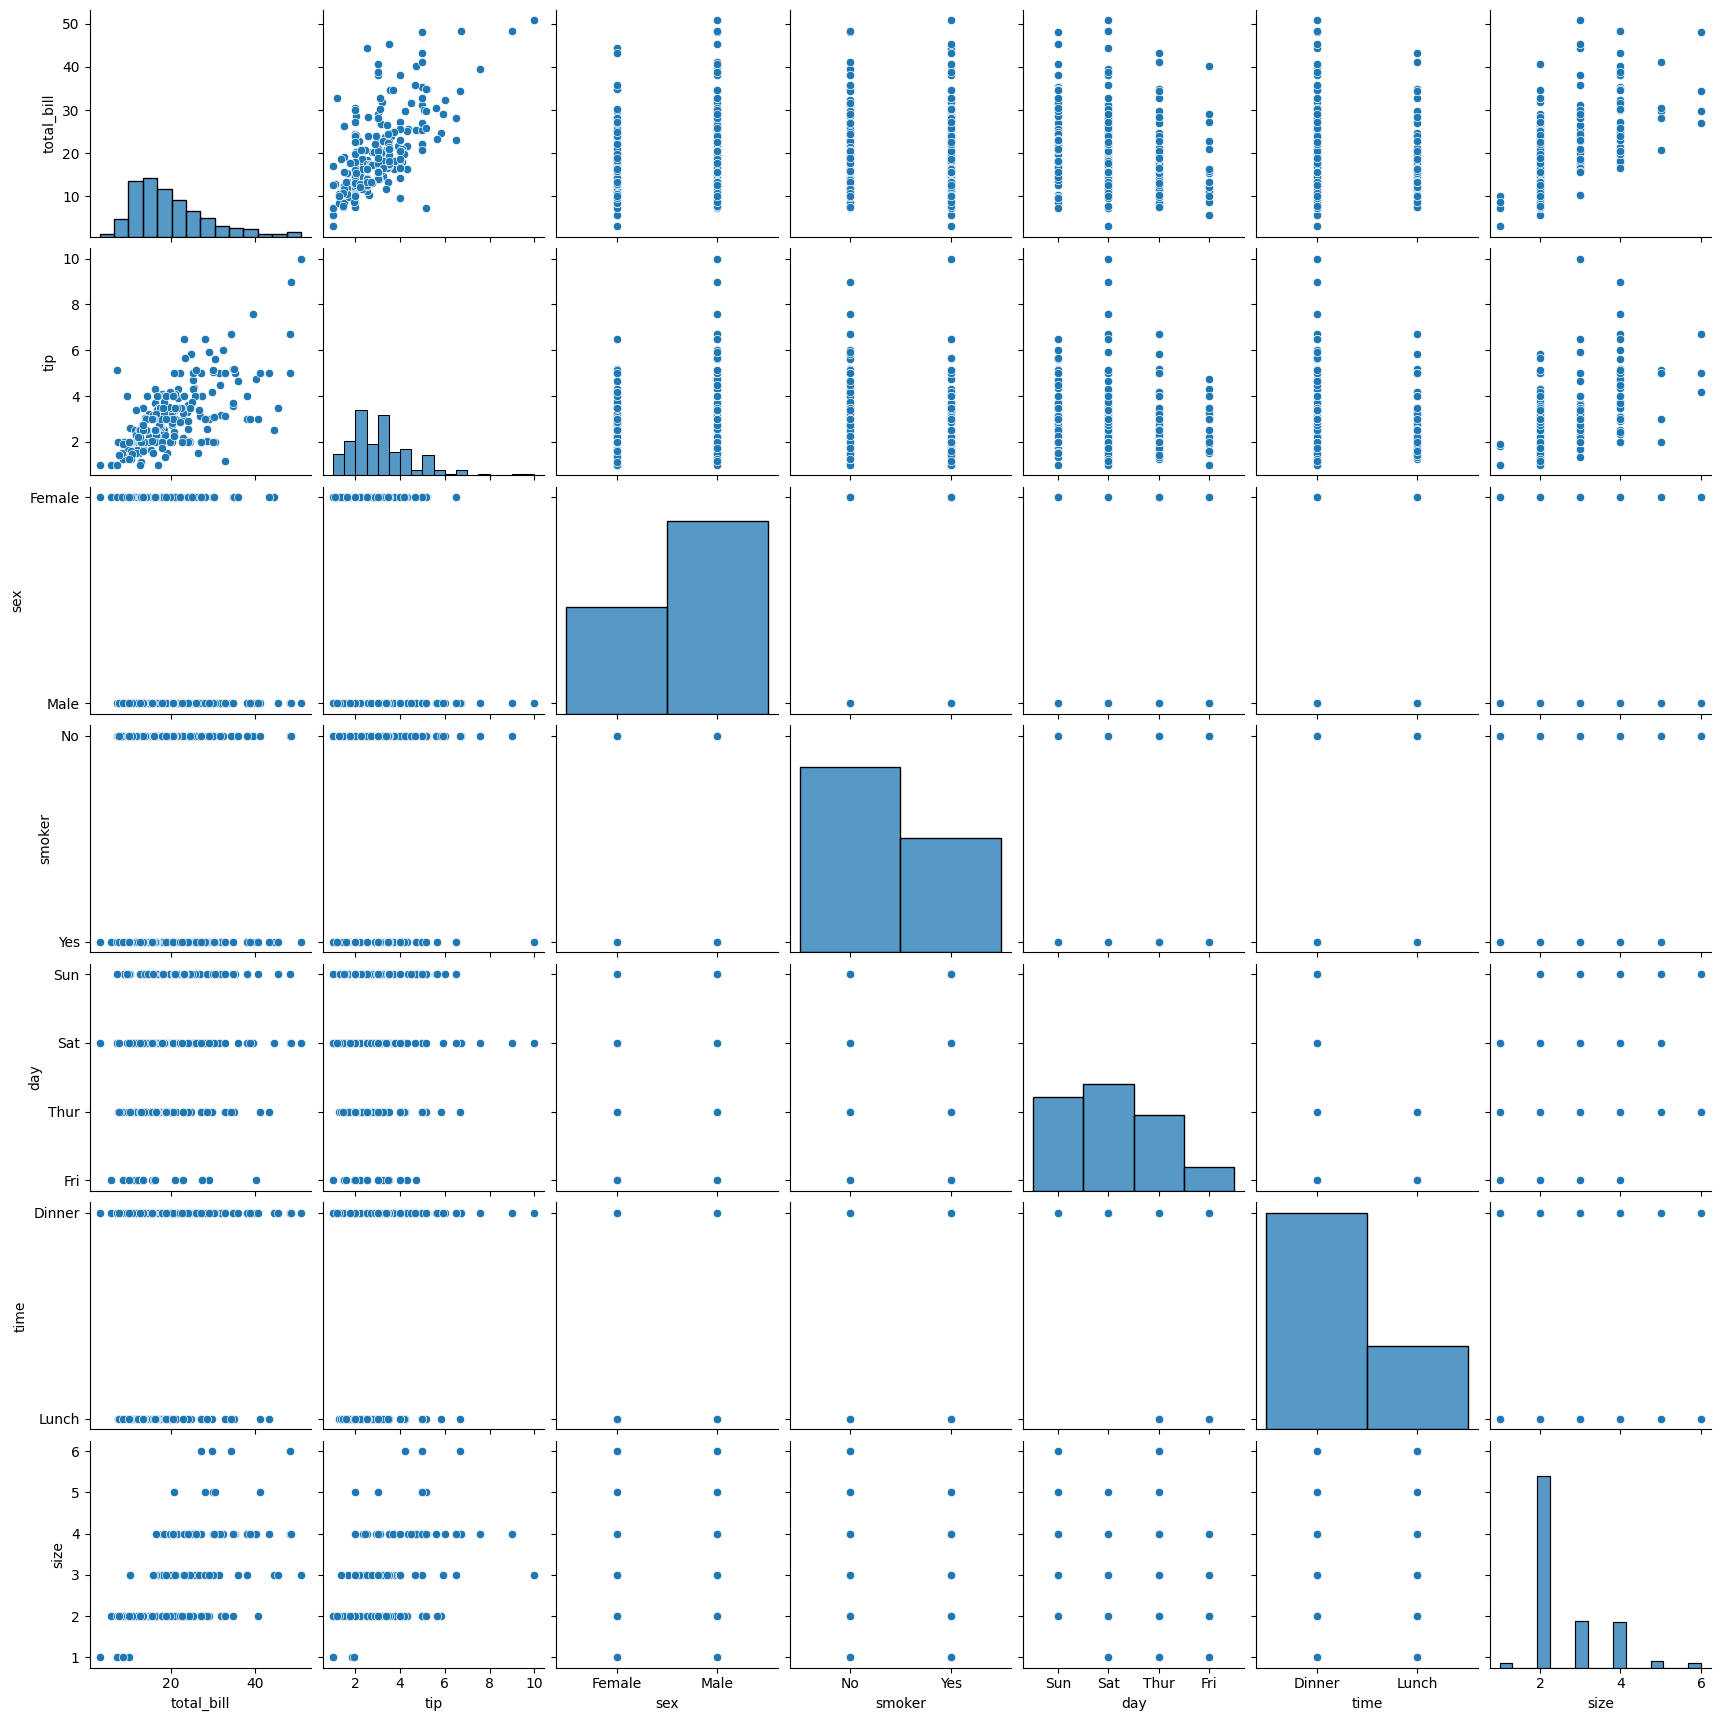

In [9]:
vizDDA(df_restaurant)

##### Testing vizDDA on titanic example

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


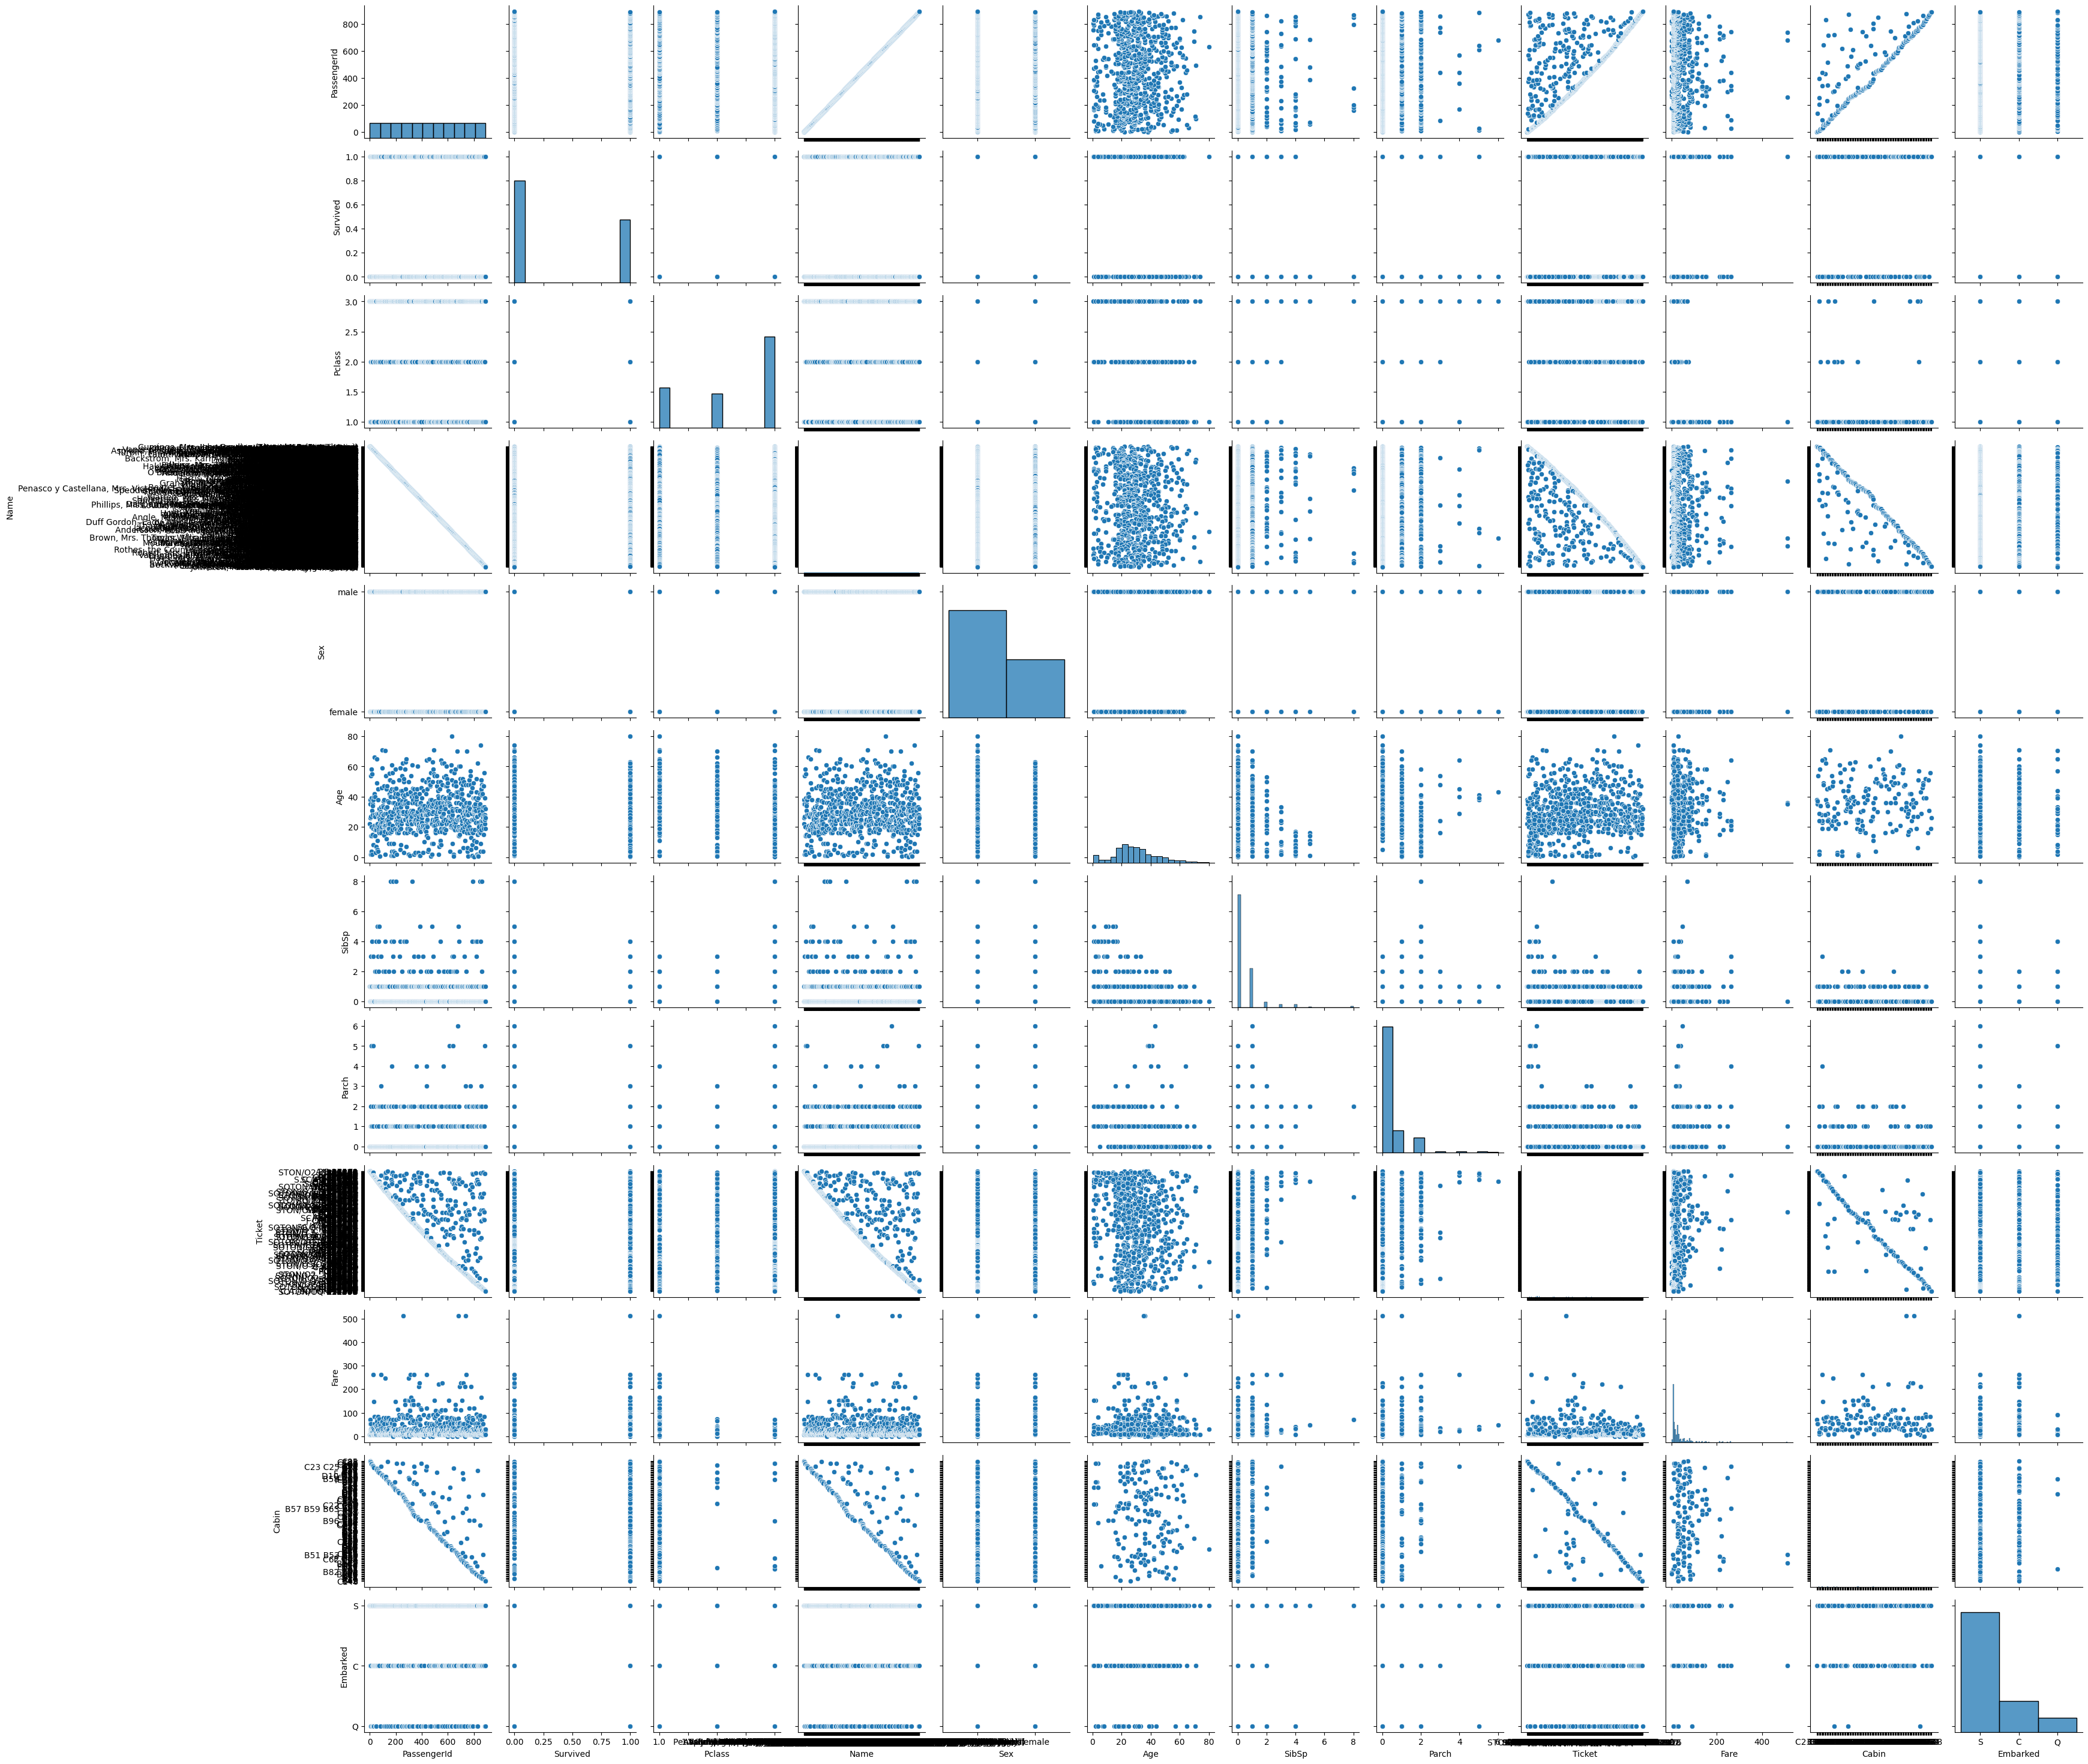

In [10]:
vizDDA(df_titanic)

##### Testing vizDDA on PISA example

In [ ]:
vizDDA(df_pisa)

### Task 3

In [12]:
#Calculating the missing values for every column in the restaurant (tipping) dataframe
restaurant_missing_values = df_restaurant.isna().sum(axis=1)

#Adding the number of missing values calculated above to a new column titled "MissingValueCount"
df_restaurant["MissingValueCount"]=restaurant_missing_values

df_restaurant

,total_bill,tip,sex,smoker,day,time,size,MissingValueCount
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0


In [13]:
#Running quantDDA on the modified dataframe
quantDDA(df_restaurant)

,num_obs,num_entries,num_unique,num_missing,Q3,Q2,Q1,num_outliers,num_extreme,mode,mean,std_dev,max,min,skewness,kurtosis
total_bill,244.0,244.0,229.0,0.0,24.1275,17.795,13.3475,9.0,0.0,13.42,19.785943,8.902412,50.81,3.07,1.133213,1.218484
tip,244.0,244.0,123.0,0.0,3.5625,2.900,2.0000,9.0,2.0,2.0,2.998279,1.383638,10.00,1.00,1.465451,3.648376
sex,244,244,2,0,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,244,2,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
day,244,244,4,0,NaN,NaN,NaN,NaN,NaN,Sat,NaN,NaN,NaN,NaN,NaN,NaN
time,244,244,2,0,NaN,NaN,NaN,NaN,NaN,Dinner,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,244.0,6.0,0.0,3.0000,2.000,2.0000,9.0,0.0,2.0,2.569672,0.951100,6.00,1.00,1.447882,1.731700
MissingValueCount,244.0,244.0,1.0,0.0,0.0000,0.000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000


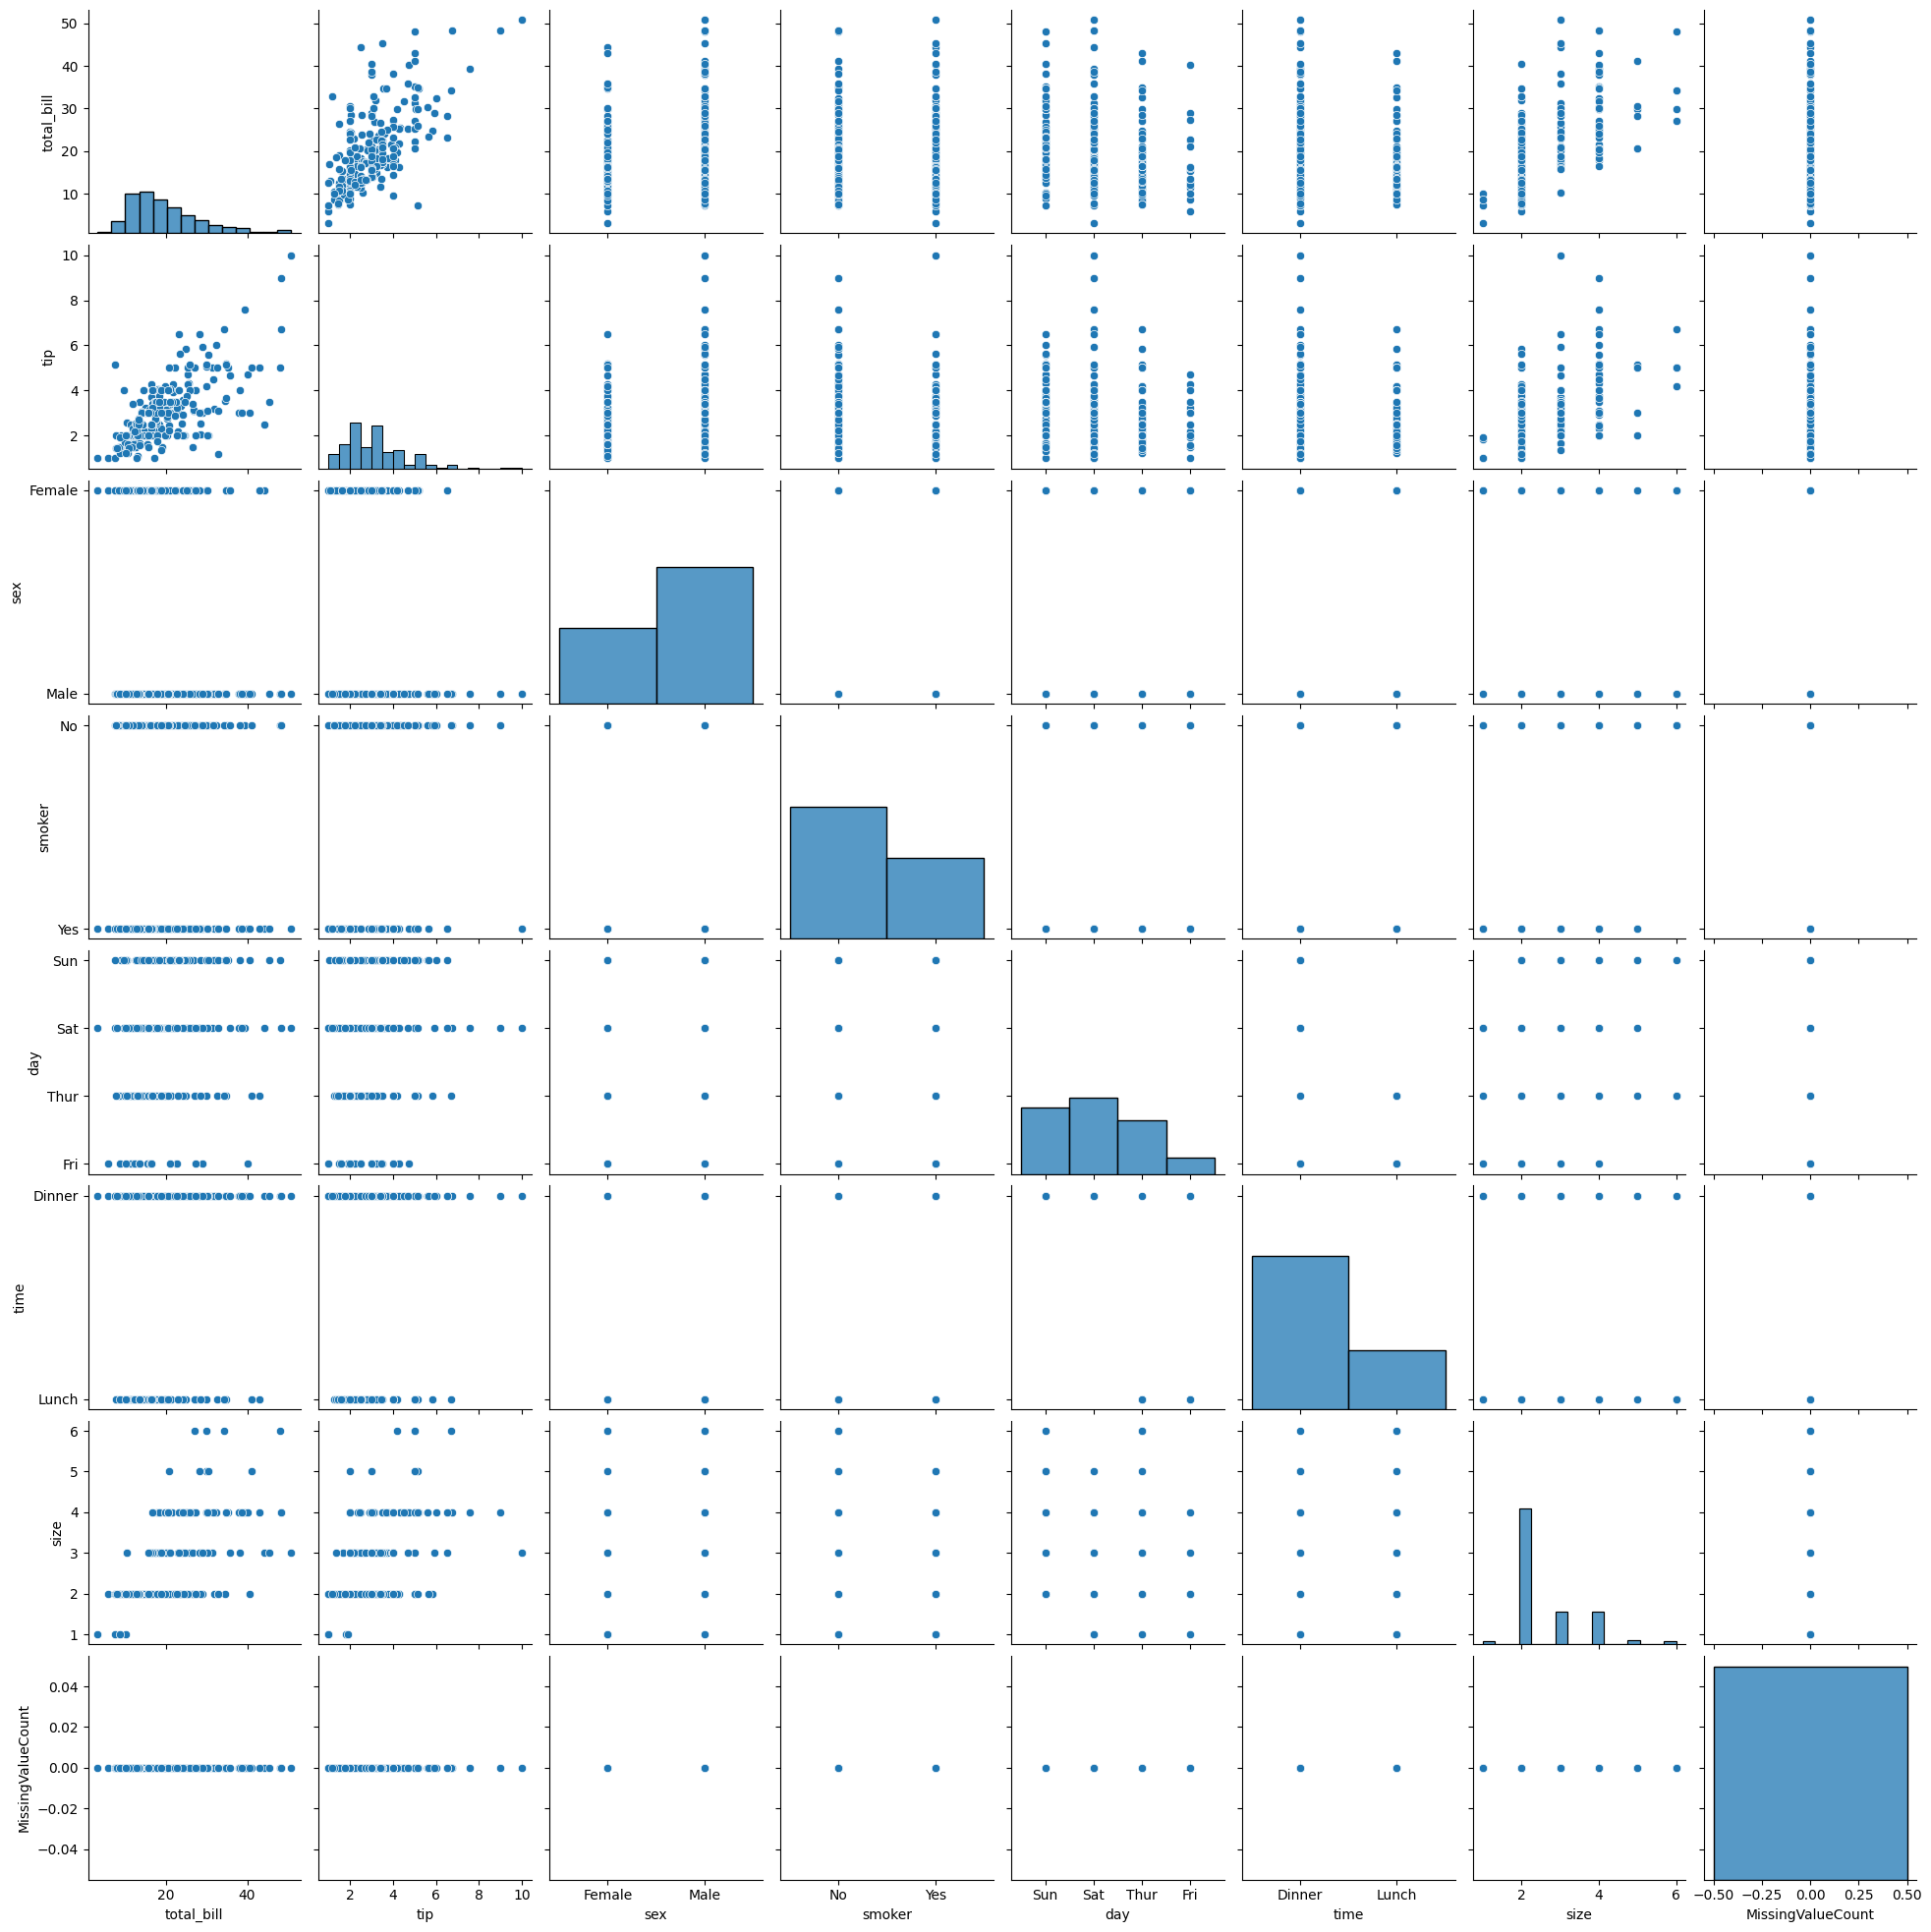

In [16]:
#running vizDDA on the modified dataframe
vizDDA(df_restaurant)

In [14]:
#Calculating the missing values for every column in the titanic dataframe
titanic_missing_values = df_titanic.isna().sum(axis=1)

#Adding the number of missing values calculated above to a new column titled "MissingValueCount"
df_titanic["MissingValueCount"]=titanic_missing_values

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissingValueCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [15]:
#Running quantDDA on the modified dataframe
quantDDA(df_titanic)

,num_obs,num_entries,num_unique,num_missing,Q3,Q2,Q1,num_outliers,num_extreme,mode,mean,std_dev,max,min,skewness,kurtosis
PassengerId,891.0,891.0,891.0,0.0,668.5,446.0000,223.5000,0.0,0.0,1.0,446.000000,257.353842,891.0000,1.00,0.000000,-1.200000
Survived,891.0,891.0,2.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.383838,0.486592,1.0000,0.00,0.478523,-1.775005
Pclass,891.0,891.0,3.0,0.0,3.0,3.0000,2.0000,0.0,0.0,3.0,2.308642,0.836071,3.0000,1.00,-0.630548,-1.280015
Name,891,891,891,0,NaN,NaN,NaN,NaN,NaN,"Abbing, Mr. Anthony",NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,891,2,0,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,714.0,89.0,177.0,38.0,28.0000,20.1250,11.0,0.0,24.0,29.699118,14.526497,80.0000,0.42,0.389108,0.178274
SibSp,891.0,891.0,7.0,0.0,1.0,0.0000,0.0000,46.0,12.0,0.0,0.523008,1.102743,8.0000,0.00,3.695352,17.880420
Parch,891.0,891.0,7.0,0.0,0.0,0.0000,0.0000,213.0,213.0,0.0,0.381594,0.806057,6.0000,0.00,2.749117,9.778125
Ticket,891,891,681,0,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,891.0,248.0,0.0,31.0,14.4542,7.9104,116.0,53.0,8.05,32.204208,49.693429,512.3292,0.00,4.787317,33.398141


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


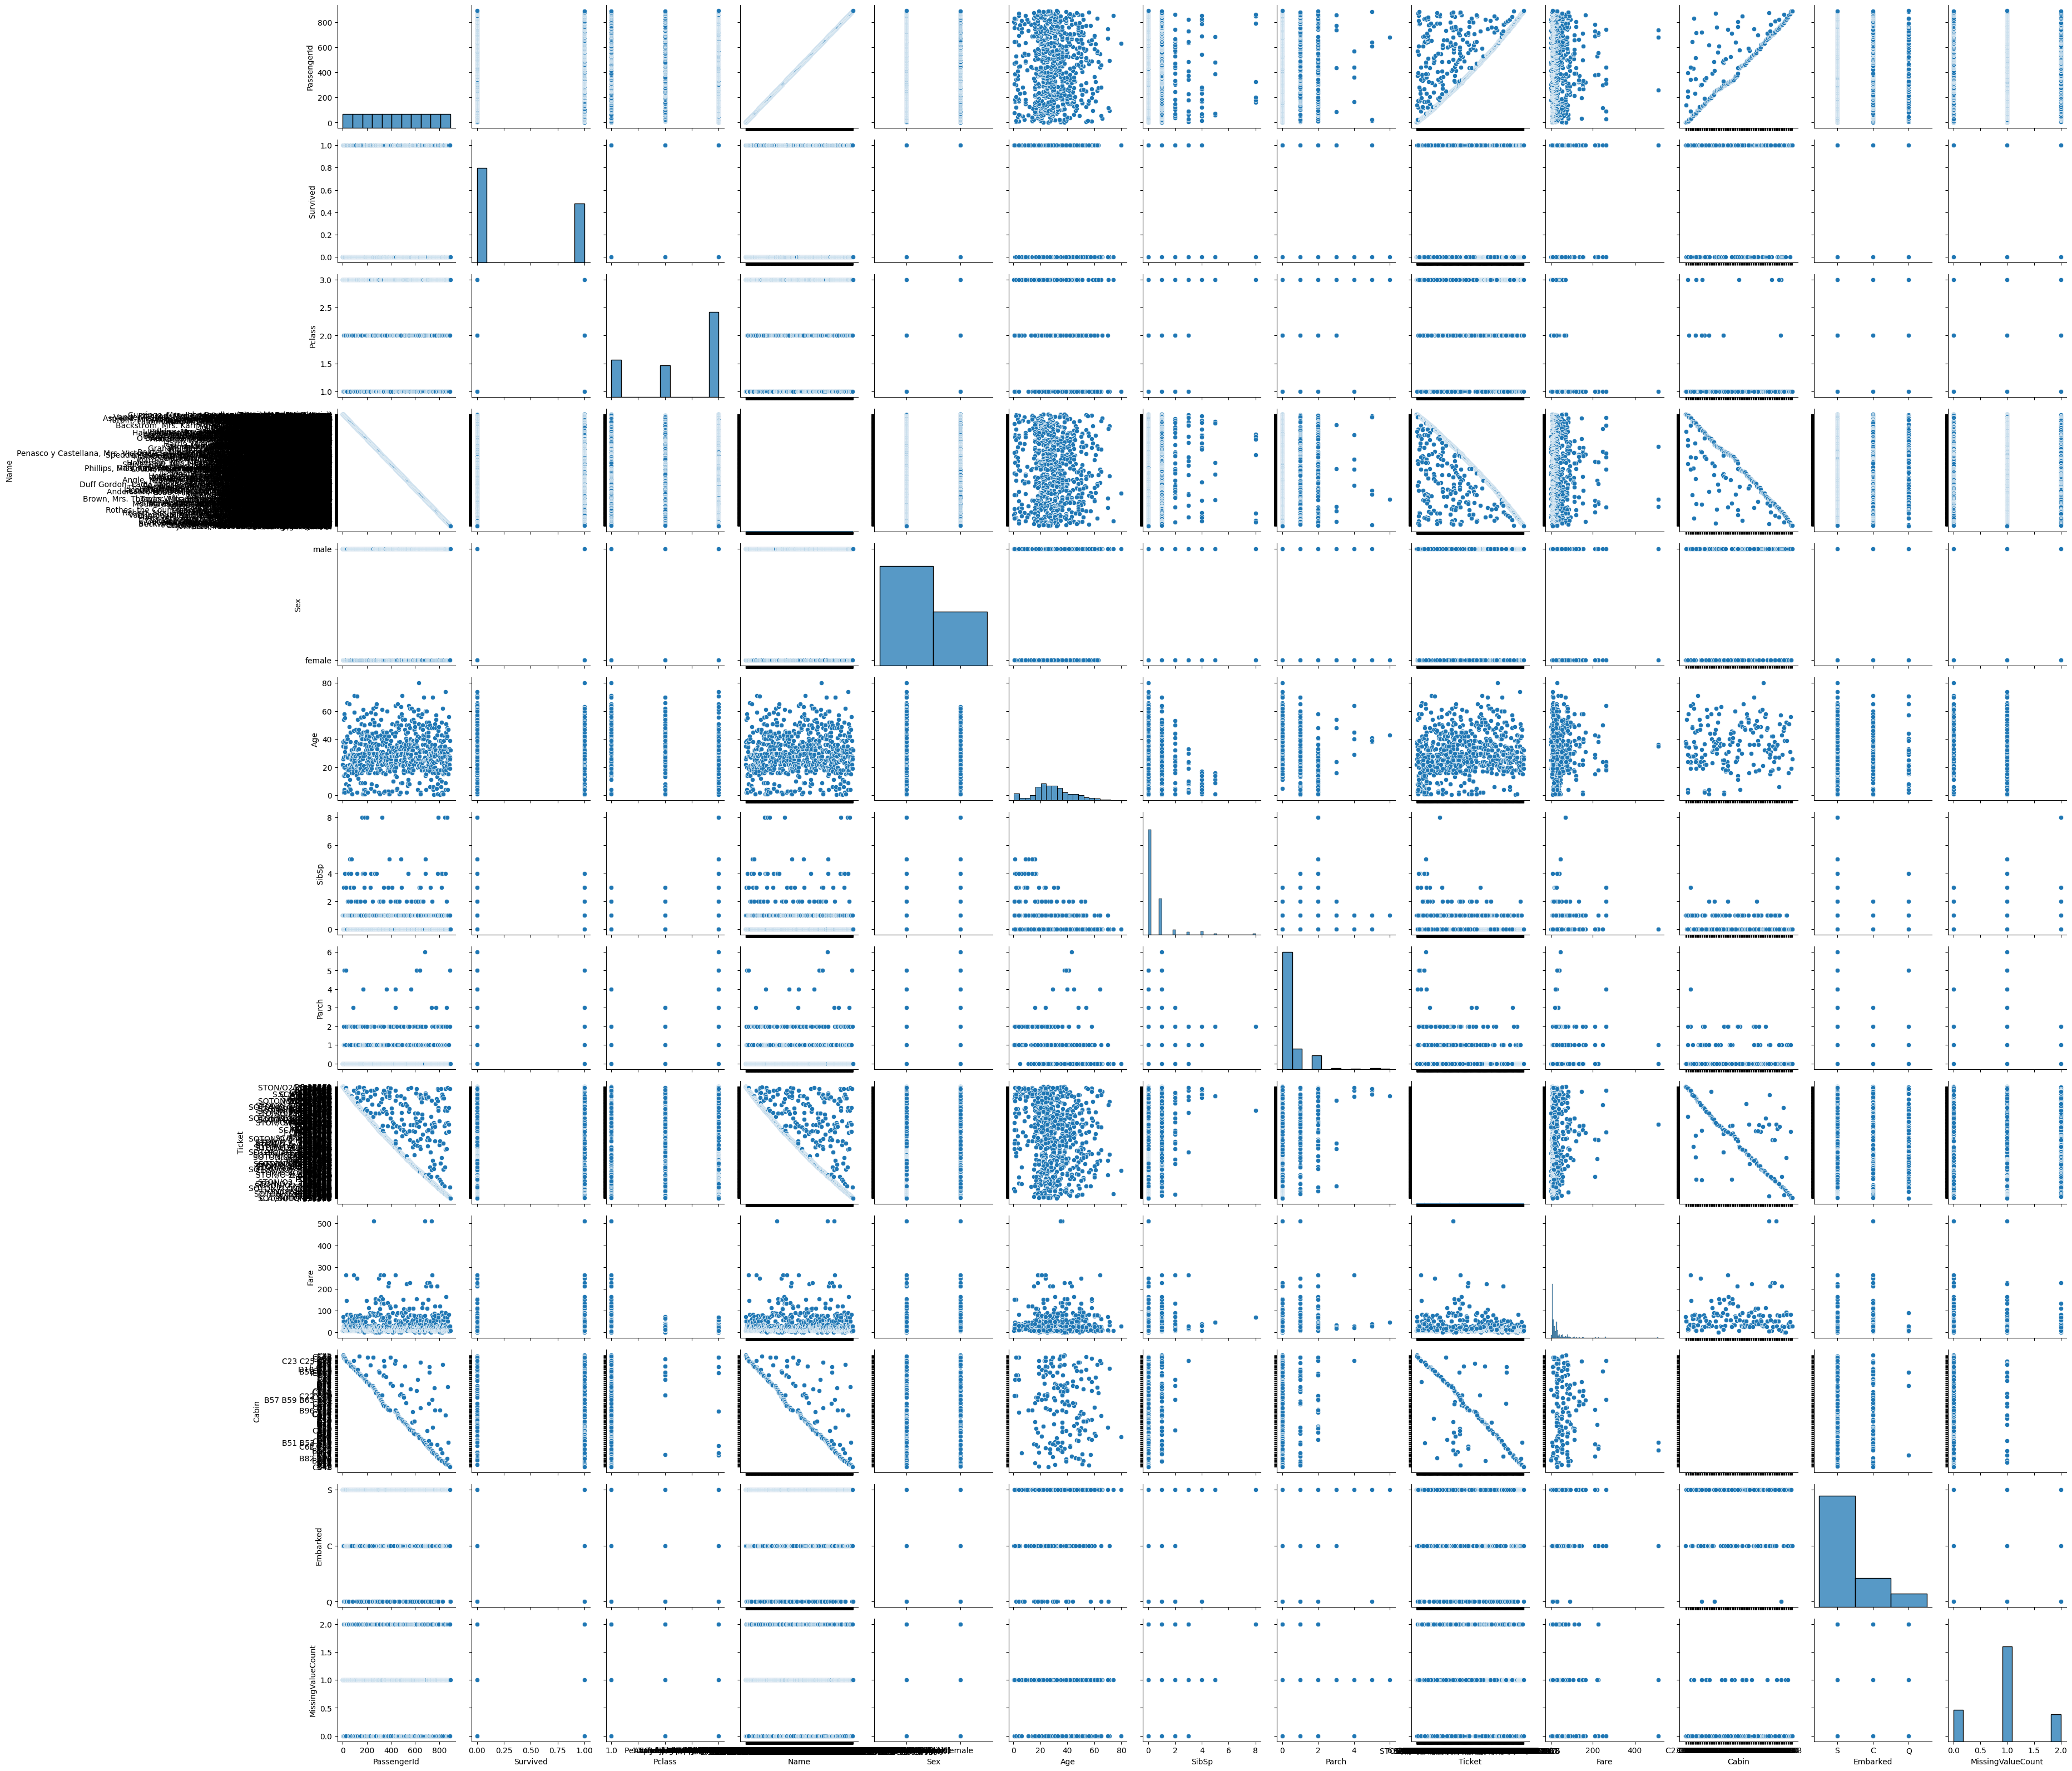

In [17]:
#running vizDDA on the modified dataframe
vizDDA(df_titanic)

In [18]:
#Calculating the missing values for every column in the PISA dataframe
pisa_missing_values = df_pisa.isna().sum(axis=1)

#Adding the number of missing values calculated above to a new column titled "MissingValueCount"
df_pisa["MissingValueCount"]=pisa_missing_values

df_pisa

,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,ADMINMODE,...,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,MissingValueCount
0,Albania,Albania,800002.0,07MS,Albania,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,8
1,Albania,Albania,800003.0,07MS,Albania,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,24
2,Albania,Albania,800004.0,07MS,Albania,Albania,ALB - stratum 11: Rural / South / Public,Albania,No,Computer,...,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,3
3,Albania,Albania,800005.0,07MS,Albania,Albania,ALB - stratum 07: Rural / North / Public,Albania,No,Computer,...,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,8
4,Albania,Albania,800006.0,07MS,Albania,Albania,ALB - stratum 05: Urban / South / Public,Albania,No,Computer,...,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,Tatarstan (RUS),Tatarstan (RUS),98300802.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,0.1964,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,3
21899,Tatarstan (RUS),Tatarstan (RUS),98300803.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,0.6736,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,5
21900,Tatarstan (RUS),Tatarstan (RUS),98300804.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,-1.4551,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,4
21901,Tatarstan (RUS),Tatarstan (RUS),98300805.0,07MS,Russian Federation,Russian Federation: Republic of Tatarstan,QRT - stratum 87: Tatarstan,Tatarstan (RUS),No,Computer,...,-0.0019,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,4


In [19]:
#Running quantDDA on the modified dataframe
quantDDA(df_pisa)

,num_obs,num_entries,num_unique,num_missing,mode,Q3,Q2,Q1,num_outliers,num_extreme,mean,std_dev,max,min,skewness,kurtosis
CNTRYID,21903,21903,80,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT,21903,21903,80,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNTSCHID,21903.0,21903.0,21903.0,0.0,800002.0,7.030002e+07,4.000022e+07,1.910014e+07,0.0,0.0,4.347357e+07,2.728971e+07,9.830081e+07,800002.00000,0.092814,-1.168849
CYC,21903,21903,1,0,07MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NatCen,21903,21903,79,0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W_FSTUWT_SCH_SUM,21903.0,21903.0,21075.0,0.0,42.30265,1.184157e+03,3.114835e+02,1.231393e+02,2731.0,1610.0,1.309747e+03,3.206526e+03,6.917005e+04,1.00000,7.376085,82.299053
SENWT,21903.0,21903.0,13044.0,0.0,5.50544,2.340857e+01,1.139931e+01,5.505440e+00,1406.0,592.0,1.826234e+01,2.214126e+01,3.287267e+02,0.15084,3.786689,24.311327
VER_DAT,21903,21903,79,0,26APR19:08:54:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOOKID,21903,0,1,21903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Running vizDDA on the modified dataframe
vizDDA(df_pisa)